## Réaalisé par :
## LAAJAJ Youness et ESSABBAHI Abdelmaoula
## Master Data Science

In [3]:
import numpy as np
np.set_printoptions(threshold=None,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Réduction de dimensions et Visualisation des données

In [4]:
data = pd.read_csv('./villes.csv', sep=';')

In [5]:
data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [6]:
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [8]:
# Normalisation des données

from sklearn.preprocessing import StandardScaler

Xnorm = StandardScaler().fit_transform(X)

In [15]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xnorm)
X_pca = pd.DataFrame(data = principalComponents, columns = ['Axe 1', 'Axe 2'])
print(pca.components_[0,:])
print(pca.components_[1,:])


[0.27151028 0.28846164 0.3010811  0.30354174 0.28353089 0.27841907
 0.27290295 0.28757774 0.30472022 0.3038548  0.29242808 0.2729549 ]
[ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
 -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]


#### Les composantes du premier axe contribuent avec le meme poids et donc c'est un axe de moyenne. Les composantes du deuxième axe sont positifs pour les mois d'hiver et négatifs pour les mois d'été. Cela permet de comprendre la significativité des axes réduits.

In [14]:
finalDf = pd.concat([X_pca, data[['ville']]], axis = 1)
finalDf.head()


,Axe 1,Axe 2,ville
0,5.187281,0.759789,ajac
1,-0.887786,0.769878,ange
2,0.406077,0.484902,ango
3,-2.923747,-0.913170,besa
4,3.117036,2.027500,biar


In [16]:
info=pca.explained_variance_ratio_
print(info)

sum_info=sum(info)
print(sum_info)


[0.87268193 0.11720602]
0.9898879529268558


#### 2-a) Donc avec deux axes on peut conserver 98% de l’information représentée dans le nuage initial

#### 2-b) Interprétation des deux premiers axes principaux: le premier axe contient 87% d'information ce qui veut dire qu'il est lié linéairement avec plus de variables  et le deuxième contient 11% ( lié avec moins de variable que le premier) et l'ensemble de ces deux axes contient 98% d'information
#### Le premier axe contient l'information sur la moyenne de température et le deuxième axe contient la variabilité entre l'été et l'hiver.


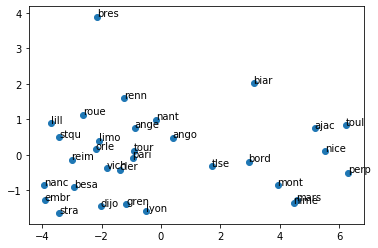

In [12]:
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1])
for label, x, y in zip(labels, X_pca.iloc[:, 0], X_pca.iloc[:, 1]):
    
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    
plt.show()

## Données de 'crimes'

In [18]:
data_crime = pd.read_csv('./crimes.csv', sep=';')
data_crime.head()


,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [24]:
X_crime = data_crime.iloc[:, 1:8].values
labels_crime = data_crime.iloc[:, 0].values


# Standardizing the features
X_crime = StandardScaler().fit_transform(X_crime)


# PCA
pca1 = PCA(n_components=4)
principalComponents = pca1.fit_transform(X_crime)
X_crime_pca = pd.DataFrame(data = principalComponents)

finalDf_crime = pd.concat([X_crime_pca, data_crime[['Etat ']]], axis = 1)



info_crime=pca1.explained_variance_ratio_

finalDf_crime.head()



,0,1,2,3,Etat
0,-0.050387,-2.117383,0.506738,0.253533,Alabama
1,2.446100,0.168214,-0.070439,1.172253,Alaska
2,3.044739,0.853523,-1.769737,-0.117392,Arizona
3,-1.065115,-1.359100,-0.018524,0.021755,Arkansas
4,4.327295,0.144641,0.278959,0.025377,California


In [25]:
print(info_crime)

sum_info_crime=sum(info_crime)

print(sum_info_crime)

[0.58785136 0.17696026 0.10368809 0.04520458]
0.913704287620304


In [30]:
print("participation des coeficients pour l'axe 1 :" ,pca1.components_[0,:])
print("participation des coeficients pour l'axe 2 :", pca1.components_[1,:])
print("participation des coeficients pour l'axe 3 :", pca1.components_[2,:])
print("participation des coeficients pour l'axe 4 :", pca1.components_[3,:])

participation des coeficients pour l'axe 1 : [0.30027916 0.43175936 0.39687549 0.3966517  0.44015721 0.35735953
 0.29517681]
participation des coeficients pour l'axe 2 : [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
  0.50242093]
participation des coeficients pour l'axe 3 : [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
  0.56838373]
participation des coeficients pour l'axe 4 : [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
  0.41923832]


#### Donc avec 4 axes on peut conserver 91% de l’information représentée dans le nuage initial

## Données 'Startups'

In [31]:
data_startup = pd.read_csv('./50_Startups.csv', sep=';')
data_startup


X_startup = data_startup.iloc[:, 1:8].values
labels_startup= data_startup.iloc[:, 0].values


# Standardizing the features
X_startup = StandardScaler().fit_transform(X_startup)


# PCA

pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_startup)
X_startup_pca = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([X_startup_pca, data_startup[['Id']]], axis = 1)

finalDf.head()




,0,1,Id
0,3.599079,0.061435,1
1,3.513141,-0.503346,2
2,2.960900,1.134643,3
3,2.707530,0.477886,4
4,2.210169,1.368812,5


In [32]:
info_startup=pca2.explained_variance_ratio_


print(info_startup)

sum_info_startup=sum(info_startup)

print(sum_info_startup)



[0.66804393 0.25484695]
0.9228908746506942


In [34]:
data_startup.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [33]:
print("participation des coeficients pour l'axe 1 :" ,pca2.components_[0,:])
print("participation des coeficients pour l'axe 2 :", pca2.components_[1,:])

participation des coeficients pour l'axe 1 : [0.59347855 0.14737886 0.52064694 0.59580992]
participation des coeficients pour l'axe 2 : [-0.04048087 -0.95051314  0.30797098  0.00632069]


#### Donc avec deux axes on peut conserver 92% de l’information représentée dans le nuage initial. Le premier axe a des participations un peu près égales des variables  'R&D','Depenses Marketing' et 'Benefice' et plus grande que la participation de 'Dépenses Administration'. Le deuxième axe est constitué par une participation dominante négative de 'Dépenses Administration' et une participation positive de 'Depenses Marketing', ce qui va faire une distinction entre les entreprises selon le type des dépenses. 

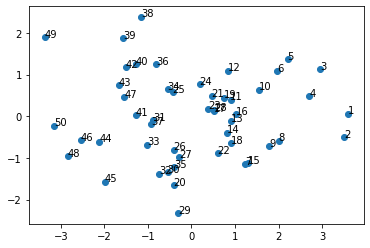

In [18]:
plt.scatter(X_startup_pca.iloc[:, 0], X_startup_pca.iloc[:, 1])
for label, x, y in zip(labels_startup, X_startup_pca.iloc[:, 0], X_startup_pca.iloc[:, 1]):
    
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    
plt.show()


# Partie 2 : Clustering


In [36]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=3,random_state=0)

Kmean.fit(X_pca)

clustering = Kmean.labels_
print(clustering)

[1 2 2 0 1 1 2 2 0 0 2 0 2 2 1 1 0 2 1 1 2 2 1 0 2 2 0 0 1 1 2 2]


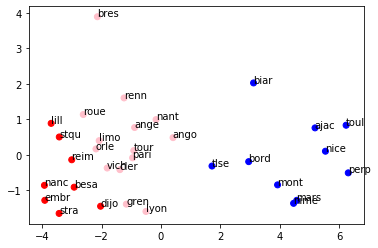

In [37]:
colors = ['red','yellow','blue','pink']

import matplotlib 
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca.iloc[:, 0], X_pca.iloc[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Pour la méthode Average

In [43]:
from sklearn.cluster import AgglomerativeClustering

Agglom_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')

Agglom_ward.fit(X_pca)


clustering_Agglom_ward = Agglom_ward.labels_
print(clustering_Agglom_ward)

[1 2 2 0 1 1 0 2 2 0 2 0 0 2 1 1 0 2 1 1 0 2 1 0 2 0 0 0 1 1 2 2]


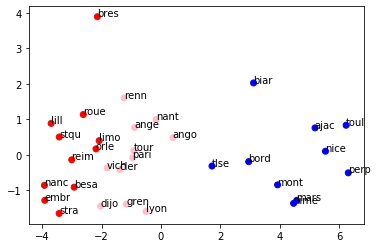

In [39]:
colors = ['red','yellow','blue','pink']

plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c= clustering_Agglom_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca.iloc[:, 0], X_pca.iloc[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Pour la méthode Average

In [44]:
Agglom_average = AgglomerativeClustering(n_clusters=3, linkage='average')

Agglom_average.fit(X_pca)


clustering_Agglom_average = Agglom_average.labels_
print(clustering_Agglom_average)

[0 1 1 1 0 0 2 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1]


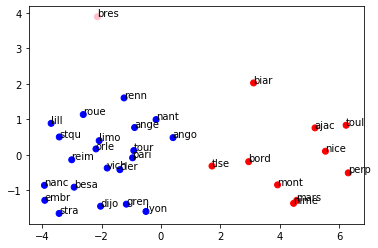

In [24]:
colors = ['red','yellow','blue','pink']
 
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c= clustering_Agglom_average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca.iloc[:, 0], X_pca.iloc[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### Le meilleur algorithme de clustering pour 3 clusters est:   AgglomerativeClustering avec la méthode Average, puisq'il permet de bien répartir les données sur les 3 classes.

### La meilleure partition (nombre de clusters) pour la méthode KMeans

In [41]:
from sklearn import metrics

for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i,random_state=0).fit_predict(X)
    print(metrics.silhouette_score(X, clustering,metric='euclidean'))
    print()

0.6181156437258196

0.409120008322892

0.3494043250123232

0.32075396348111074



#### Donc on peut dire qu'une partion de 2 Cluster donne une meilleure résultat (0,62 )

## Le meilleur algorithme à utiliser pour obtenir 3 clusters

#### La métrique intra-class

In [67]:
clustering_kmean = KMeans(n_clusters=3,random_state=0).fit_predict(X)
Agglom_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X)
Agglom_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)

print("la métrique silhouette pour Kmeans avec 3 clusters est :", metrics.silhouette_score(X, clustering_kmean,metric='euclidean'))
print("la métrique silhouette pour AgglomerativeClustering ward avec 3 clusters est :", metrics.silhouette_score(X, Agglom_ward,metric='euclidean'))
print("la métrique silhouette pour AgglomerativeClustering average avec 3 clusters est :", metrics.silhouette_score(X, Agglom_average,metric='euclidean'))


la métrique silhouette pour Kmeans avec 3 clusters est : 0.409120008322892
la métrique silhouette pour AgglomerativeClustering ward avec 3 clusters est : 0.40631332038912493
la métrique silhouette pour AgglomerativeClustering average avec 3 clusters est : 0.4917281366704155


#### La métrique inter-class

In [77]:

clustering_kmean = KMeans(n_clusters=3,random_state=0).fit(X)
Agglom_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
Agglom_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

print("la métrique interclass pour Kmeans avec 3 clusters est :",metrics.calinski_harabasz_score(X, clustering_kmean.labels_))
print("la métrique interclass pour AgglomerativeClustering ward avec 3 clusters est :",metrics.calinski_harabasz_score(X, Agglom_ward.labels_))
print("la métrique interclass pour AgglomerativeClustering average avec 3 clusters est :", metrics.calinski_harabasz_score(X, Agglom_average.labels_))


la métrique interclass pour Kmeans avec 3 clusters est : 61.692922011236874
la métrique interclass pour AgglomerativeClustering ward avec 3 clusters est : 58.392970444842156
la métrique interclass pour AgglomerativeClustering average avec 3 clusters est : 47.788807216511756


#### Le meilleur algorithme pour avoir 3 clusters est AgglomerativeClustering avec la méthode average, puisqu'il donne la métrique intra-class (distance entre les différents clusters) la plus grande et la métrique inter-class ((distance entre les données d'un meme cluster) la plus petite. 